### Sc√©nario

Vous √™tes un professionnel des donn√©es travaillant pour Salifort Motors.

Actuellement, le taux de rotation des employ√©s de Salifort est √©lev√©. (Remarque : dans ce contexte, les donn√©es relatives √† la rotation comprennent √† la fois les employ√©s qui choisissent de quitter leur emploi et ceux qui sont licenci√©s). L'√©quipe dirigeante de Salifort est pr√©occup√©e par le nombre d'employ√©s qui quittent l'entreprise. Salifort s'efforce de cr√©er une culture d'entreprise qui favorise la r√©ussite et le d√©veloppement professionnel des employ√©s. En outre, le taux de rotation √©lev√© est co√ªteux sur le plan financier. Salifort investit beaucoup dans le recrutement, la formation et le perfectionnement de ses employ√©s.

Si Salifort pouvait pr√©dire si un employ√© quittera l'entreprise et d√©couvrir les raisons de son d√©part, elle pourrait mieux comprendre le probl√®me et √©laborer une solution.

Dans un premier temps, l'√©quipe de direction demande aux ressources humaines de mener une enqu√™te aupr√®s d'un √©chantillon d'employ√©s afin d'en savoir plus sur les causes possibles de la rotation du personnel.

Ensuite, l'√©quipe de direction vous demande d'analyser les donn√©es de l'enqu√™te et de proposer des id√©es pour accro√Ætre la fid√©lisation des salari√©s. Pour ce faire, elle vous sugg√®re de concevoir un mod√®le permettant de pr√©dire si un employ√© quittera l'entreprise en fonction de sa fonction, de son service, du nombre de projets, du nombre moyen d'heures par mois et de tout autre point de donn√©es pertinent. Un bon mod√®le aidera l'entreprise √† augmenter la r√©tention et la satisfaction professionnelle des employ√©s actuels, et √† √©conomiser de l'argent et du temps pour la formation des nouveaux employ√©s.

En tant que sp√©cialiste de l'analyse des donn√©es, l'√©quipe de direction vous laisse le soin de choisir une approche pour construire le mod√®le le plus efficace pour pr√©dire le d√©part des employ√©s. Par exemple, vous pourriez construire et √©valuer un mod√®le statistique tel que la r√©gression logistique. Vous pouvez √©galement √©laborer et √©valuer des mod√®les d'apprentissage automatique tels que l'arbre d√©cisionnel, la for√™t al√©atoire et XGBoost. Vous pouvez √©galement choisir de d√©ployer √† la fois des mod√®les statistiques et des mod√®les d'apprentissage automatique.

Quelle que soit l'approche retenue, vous devrez analyser les facteurs cl√©s de la rotation du personnel, √©laborer un mod√®le efficace et partager avec l'√©quipe de direction des recommandations sur les prochaines √©tapes.

### Nous allons travailler selon le model PACE

![alt text](download.png)

# `P`ace : Plan

Dans cette partie on va essayer de comprendre le scenario et le probleme que l'on doit r√©soudre

### 1 - Importation des packages

In [16]:
# Importation des packages

# Pour la manipulation de donn√©es
import numpy as np
import pandas as pd

# Pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Pour afficher toutes les colonnes de notre dataframe
pd.set_option('display.max_columns', None)

# Pour la mod√©lisation
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pour nos m√©triques
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Pour enrigistrer nos models
import pickle

### On charge les donn√©es

In [17]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### 2 - Exploration des donn√©es EDA

#### Informations basiques sur notre dataset

In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Statistiques Descriptives 

In [19]:
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### On renomme les colonnes

In [20]:
#On affiche les colonnes
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### On recherche les valeurs manquantes

In [22]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

On a pas de valeurs manquantes dans notre dataset

### Les valeurs dupiqu√©es

In [23]:
df0.duplicated().sum()

np.int64(3008)

Nous avons donc 3008 donn√©es dupliqu√©es dans notre dataset ce qui en repr√©sente 20%

In [24]:
# Inspectons quelques colonnes contenants des valeurs dupliqu√©es
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

Les doublons d√©tect√©s dans le jeu de donn√©es sont tr√®s probablement des erreurs plut√¥t que des entr√©es l√©gitimes. Il est tr√®s peu probable que deux employ√©s aient donn√© exactement les m√™mes r√©ponses sur toutes les colonnes, surtout si plusieurs variables sont continues (ex. : heures de travail mensuelles moyennes, nombre de projets, etc.)

In [25]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Verification des outliers

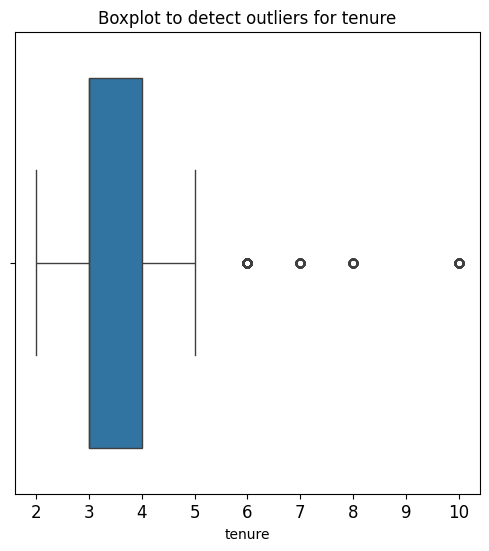

In [26]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

Ce Sch√©ma nous montre qu'il y √† des valeurs ab√©rrantes dans `tenure`

In [28]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# p`A`ce : Analyse

#### 2 - Exploration des donn√©es (EDA Suite)

On va essayer de voir le pourcentage d'employ√©s qui quittent l'entreprise

In [29]:
# Get numbers of people who left vs. stayed

print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


On remarque que 16 % des employ√©s quittent l'entreprise

### Visualisation des donn√©es

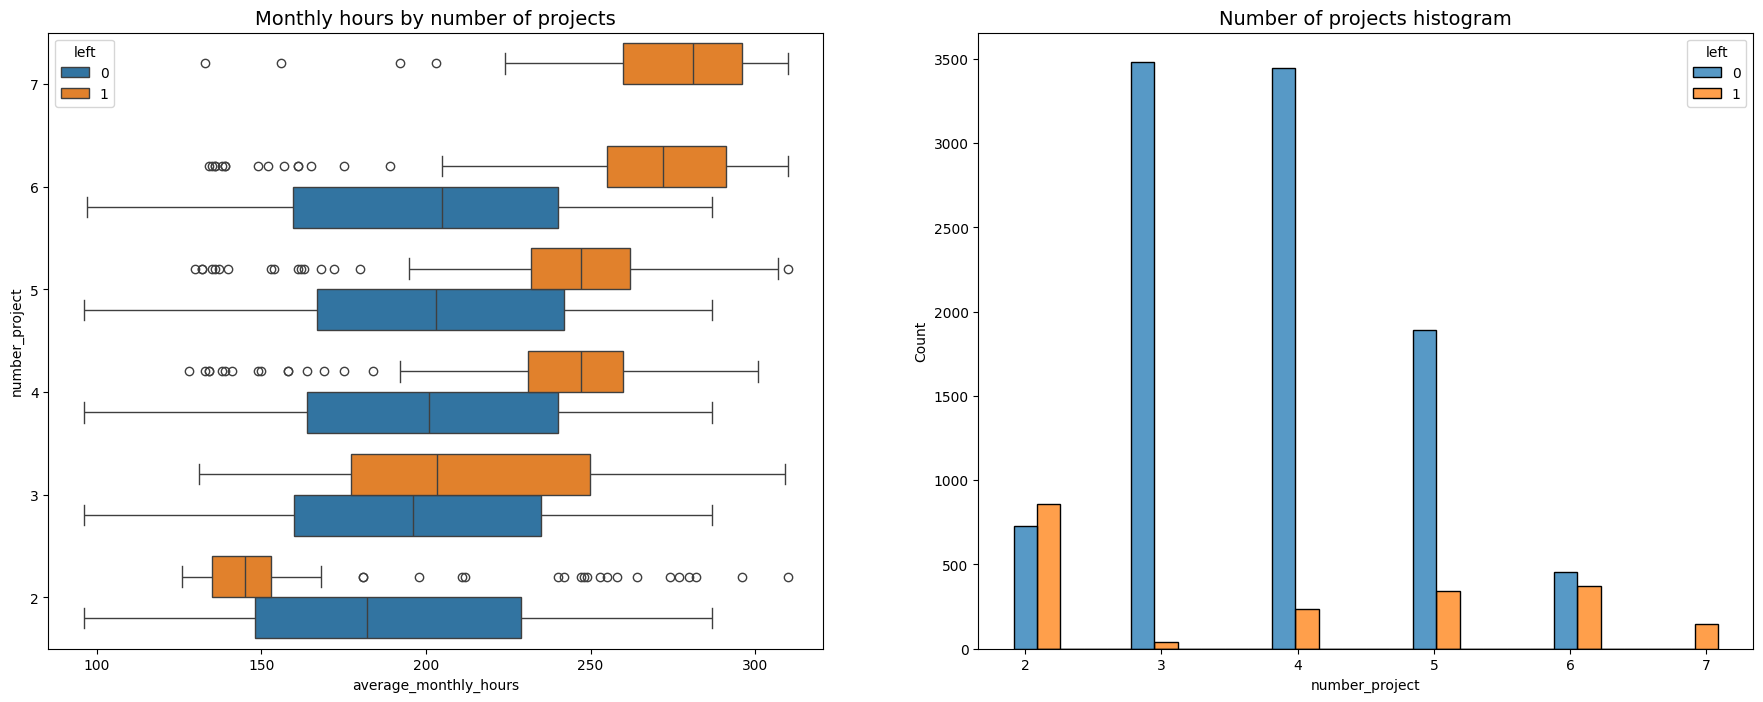

In [30]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

1. Diagramme en bo√Æte (Boxplot) : "Monthly hours by number of projects"


Ce graphique montre la distribution des heures de travail mensuelles moyennes pour diff√©rents nombres de projets, en distinguant ceux qui sont partis (left = 1, en orange) et ceux qui sont rest√©s (left = 0, en bleu).

Observations :
Faible nombre de projets (2-3) :

Les employ√©s ayant 2 projets ont un faible nombre d'heures de travail mensuelles et un taux de d√©part relativement faible, mais il existe quelques cas o√π les employ√©s ont quitt√© l'entreprise.
Ceux ayant 3 projets montrent une augmentation du taux de d√©part (plus d‚Äôorange visible), ce qui pourrait indiquer une surcharge de travail ou un m√©contentement.
Nombre de projets interm√©diaire (4-5) :

Les employ√©s avec 4 et 5 projets travaillent plus d‚Äôheures en moyenne et ont une proportion importante de d√©parts (plus d‚Äôorange).
Cela sugg√®re qu‚Äôun nombre mod√©r√© de projets pourrait √™tre un facteur contribuant au turnover.
Nombre √©lev√© de projets (6-7) :

Les employ√©s ayant 6 ou 7 projets travaillent de longues heures et montrent un taux de d√©part √©lev√©.
Ceux avec 7 projets ont presque exclusivement quitt√© l‚Äôentreprise, ce qui signifie probablement une surcharge de travail insoutenable.
Interpr√©tation :
Un exc√®s de travail (nombre √©lev√© de projets et d'heures travaill√©es) est un facteur de turnover.
Un tr√®s faible nombre de projets semble √©galement associ√© √† des d√©parts, ce qui peut sugg√©rer un manque de challenge ou de reconnaissance.



2. Histogramme : "Number of projects histogram"
Ce graphique montre la distribution du nombre de projets en fonction du statut de d√©part des employ√©s.

Observations :
Les employ√©s ayant 3 ou 4 projets sont majoritairement rest√©s (bleu dominant).
Le taux de d√©part augmente pour les employ√©s ayant 2, 6 ou 7 projets (plus d‚Äôorange).
La majorit√© des employ√©s se concentrent autour de 3 √† 5 projets, avec un pic clair √† 3 et 4 projets.
Le taux de d√©part est √©lev√© pour 2 projets (sous-engagement) et 6-7 projets (surcharge de travail).
Interpr√©tation :
Un nombre mod√©r√© de projets (3 √† 5) semble √™tre la zone de stabilit√©.
Trop peu ou trop de projets peut conduire √† une insatisfaction et √† une augmentation du turnover.
L‚Äôentreprise pourrait b√©n√©ficier d‚Äôune meilleure r√©partition du travail pour √©viter que des employ√©s aient trop ou trop peu de projets.


Conclusions g√©n√©rales
Les employ√©s ayant un nombre excessif de projets (6-7) ont un risque de turnover tr√®s √©lev√©.
‚Üí Action : Limiter la charge de travail excessive et √©quilibrer la r√©partition des projets.

Un nombre trop faible de projets (2) peut √©galement conduire au d√©part.
‚Üí Action : Identifier si ces employ√©s manquent de motivation, de reconnaissance ou d‚Äôopportunit√©s de croissance.

Les employ√©s ayant 3 √† 5 projets semblent √™tre les plus stables.
‚Üí Action : Trouver un √©quilibre optimal entre charge de travail et satisfaction.

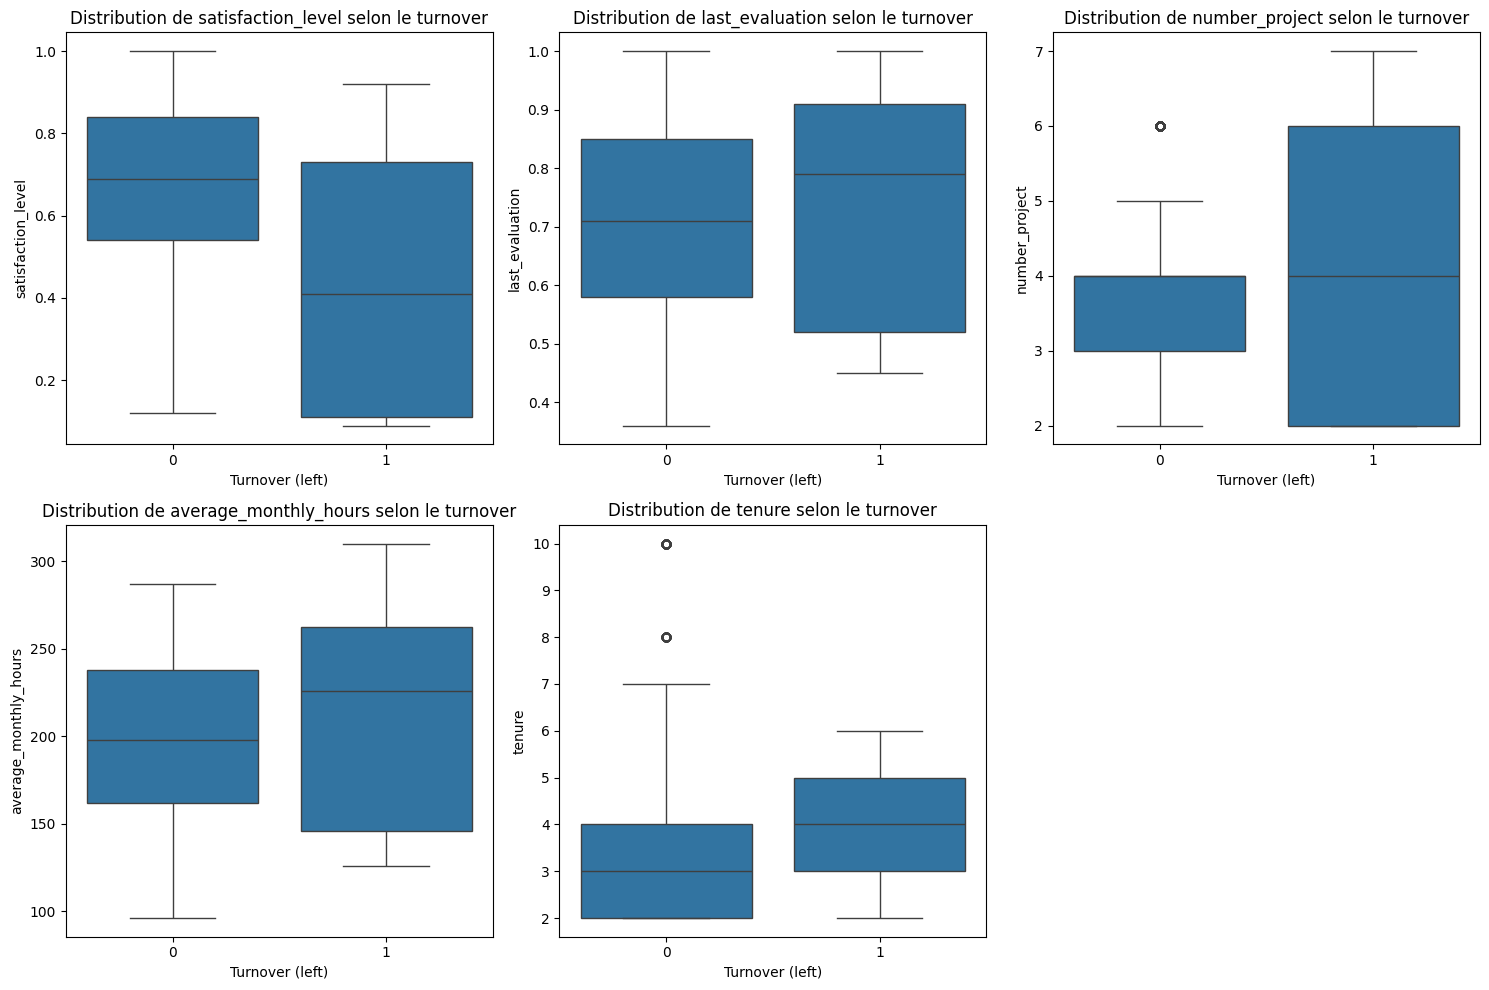

In [33]:
plt.figure(figsize=(15, 10))

# Liste des variables √† analyser avec des boxplots
variables = ['satisfaction_level', 'last_evaluation', 'number_project',
             'average_monthly_hours', 'tenure']

# Cr√©ation des boxplots pour chaque variable en fonction de "left"
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df1['left'], y=df1[var])
    plt.title(f"Distribution de {var} selon le turnover")
    plt.xlabel("Turnover (left)")
    plt.ylabel(var)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


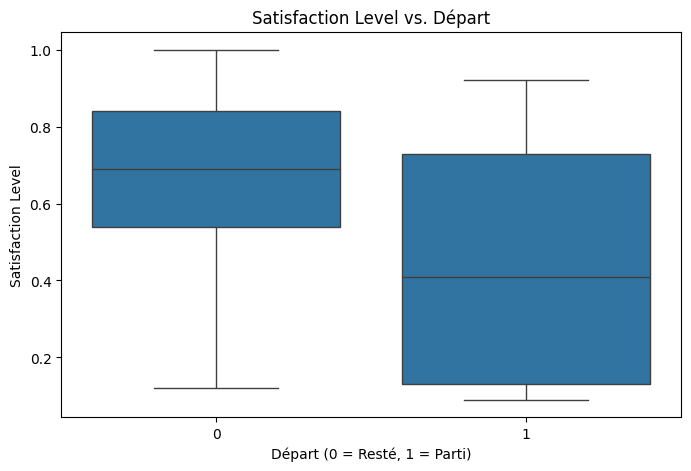

In [37]:
# Create a plot as needed
### YOUR CODE HERE ###

# üîπ 1. Satisfaction Level vs. D√©part (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x="left", y="satisfaction_level", data=df0)
plt.title("Satisfaction Level vs. D√©part")
plt.xlabel("D√©part (0 = Rest√©, 1 = Parti)")
plt.ylabel("Satisfaction Level")
plt.show()




1. Satisfaction Level vs Turnover (Boxplot)
Observations :
Les employ√©s qui restent ont un niveau de satisfaction moyen tr√®s √©lev√© (pr√®s de 0.8).
Ceux qui partent ont un niveau de satisfaction beaucoup plus faible, souvent inf√©rieur √† 0.5.
Conclusion :
Un faible niveau de satisfaction est un facteur majeur de d√©part.
Il est crucial d‚Äôam√©liorer la satisfaction des employ√©s pour r√©duire le turnover.

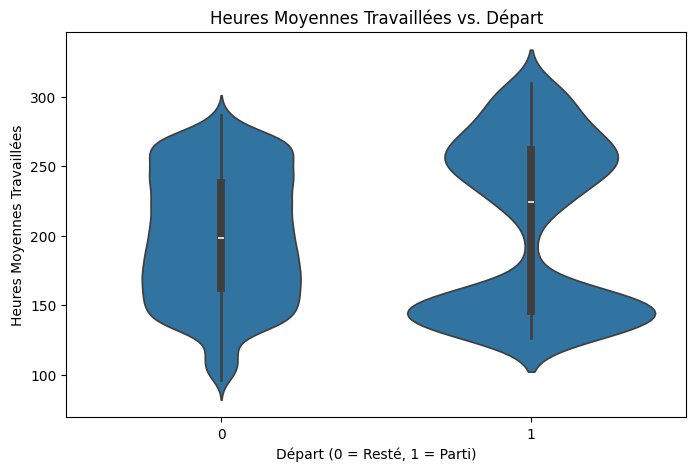

In [38]:
# üîπ 2. Heures Moyennes vs. D√©part (Violin Plot)
plt.figure(figsize=(8,5))
sns.violinplot(x="left", y="average_monthly_hours", data=df0)
plt.title("Heures Moyennes Travaill√©es vs. D√©part")
plt.xlabel("D√©part (0 = Rest√©, 1 = Parti)")
plt.ylabel("Heures Moyennes Travaill√©es")
plt.show()


2. Heures Moyennes Travaill√©es vs Turnover (Violin Plot)
Observations :
Ceux qui restent ont un nombre d‚Äôheures de travail plus mod√©r√©, g√©n√©ralement autour de 150 √† 250 heures par mois.
Ceux qui partent ont une distribution des heures de travail plus large, avec des pics √† des heures extr√™mes (tr√®s faibles ou tr√®s √©lev√©es).
Conclusion :
Les employ√©s qui travaillent trop ou trop peu d‚Äôheures semblent √™tre plus susceptibles de partir.
La gestion de la charge de travail (√©viter les heures extr√™mes) pourrait am√©liorer la r√©tention.

C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\3458426663.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="number_project", y="left", data=df0, ci=None)


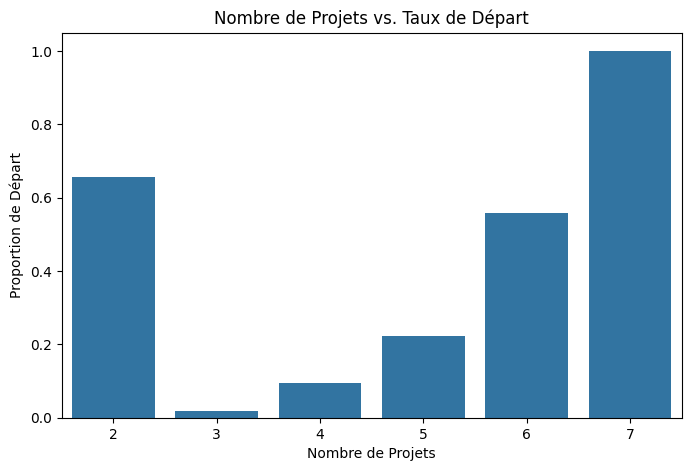

In [39]:

# üîπ 3. Nombre de Projets vs. D√©part (Barplot)
plt.figure(figsize=(8,5))
sns.barplot(x="number_project", y="left", data=df0, ci=None)
plt.title("Nombre de Projets vs. Taux de D√©part")
plt.xlabel("Nombre de Projets")
plt.ylabel("Proportion de D√©part")
plt.show()


3. Nombre de Projets vs Turnover (Barplot)
Observations :

Les employ√©s ayant 2 projets ont un taux de d√©part √©lev√©, tandis que ceux avec 3 ou 4 projets ont un taux de d√©part relativement faible.
Les employ√©s avec 6 ou 7 projets ont √©galement un taux de d√©part √©lev√©.
Conclusion :

Un nombre de projets trop faible ou trop √©lev√© semble √™tre associ√© √† un taux de d√©part plus √©lev√©.
Il est essentiel d‚Äô√©quilibrer la charge de travail avec un nombre mod√©r√© de projets (environ 3 √† 5 projets).

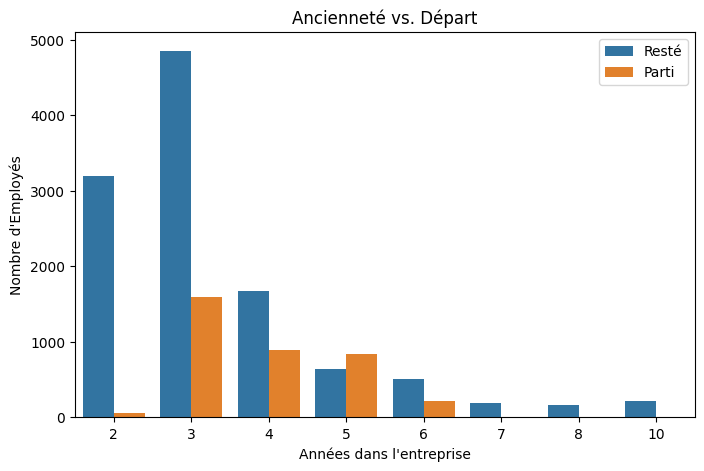

In [40]:

# üîπ 4. Anciennet√© (Time Spent) vs. D√©part (Countplot)
plt.figure(figsize=(8,5))
sns.countplot(x="tenure", hue="left", data=df0)
plt.title("Anciennet√© vs. D√©part")
plt.xlabel("Ann√©es dans l'entreprise")
plt.ylabel("Nombre d'Employ√©s")
plt.legend(["Rest√©", "Parti"])
plt.show()


4. Anciennet√© vs Turnover (Barplot)
Observations :

Le taux de d√©part est plus √©lev√© chez les employ√©s ayant moins de 3 ans d'anciennet√©, avec un pic entre 2 et 3 ans.
Les employ√©s ayant plus de 3 ans d‚Äôanciennet√© montrent un taux de d√©part plus faible.
Conclusion :

Les nouveaux employ√©s (moins de 3 ans) sont plus susceptibles de partir, sugg√©rant un besoin d‚Äôam√©liorer l‚Äôint√©gration et la gestion des premiers mois.
Une meilleure int√©gration et suivi des nouveaux employ√©s pourrait am√©liorer la r√©tention.

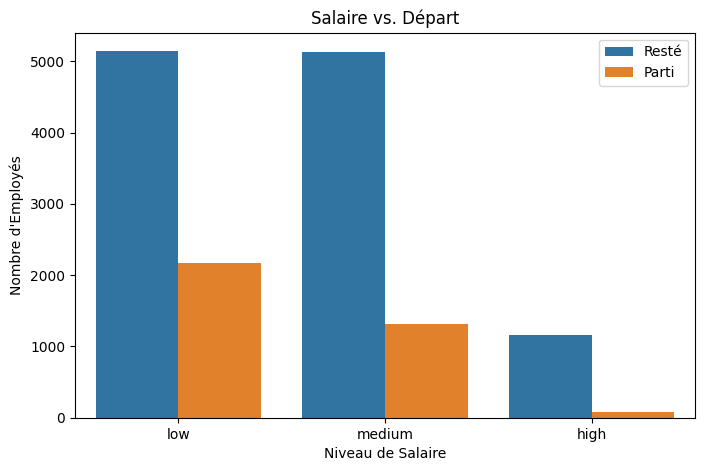

In [41]:

# üîπ 5. Salaire vs. D√©part (Countplot)
plt.figure(figsize=(8,5))
sns.countplot(x="salary", hue="left", data=df0, order=["low", "medium", "high"])
plt.title("Salaire vs. D√©part")
plt.xlabel("Niveau de Salaire")
plt.ylabel("Nombre d'Employ√©s")
plt.legend(["Rest√©", "Parti"])
plt.show()

5. Salaire vs Turnover (Barplot)
Observations :
Les employ√©s avec un salaire bas (low) ont un taux de d√©part beaucoup plus √©lev√© que ceux avec un salaire moyen ou √©lev√©.
Conclusion :
Le salaire a un impact important sur la fid√©lisation des employ√©s. Les employ√©s mal r√©mun√©r√©s sont plus susceptibles de partir.
Il peut √™tre pertinent de r√©√©valuer les salaires pour les employ√©s dans les cat√©gories de salaire faible afin d'am√©liorer la r√©tention.

Confirmons que les employ√©s avec 7 projets quittent bien l'entreprise

In [42]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Ceci confirme que tous les employ√©s ayant 7 projets sont parti

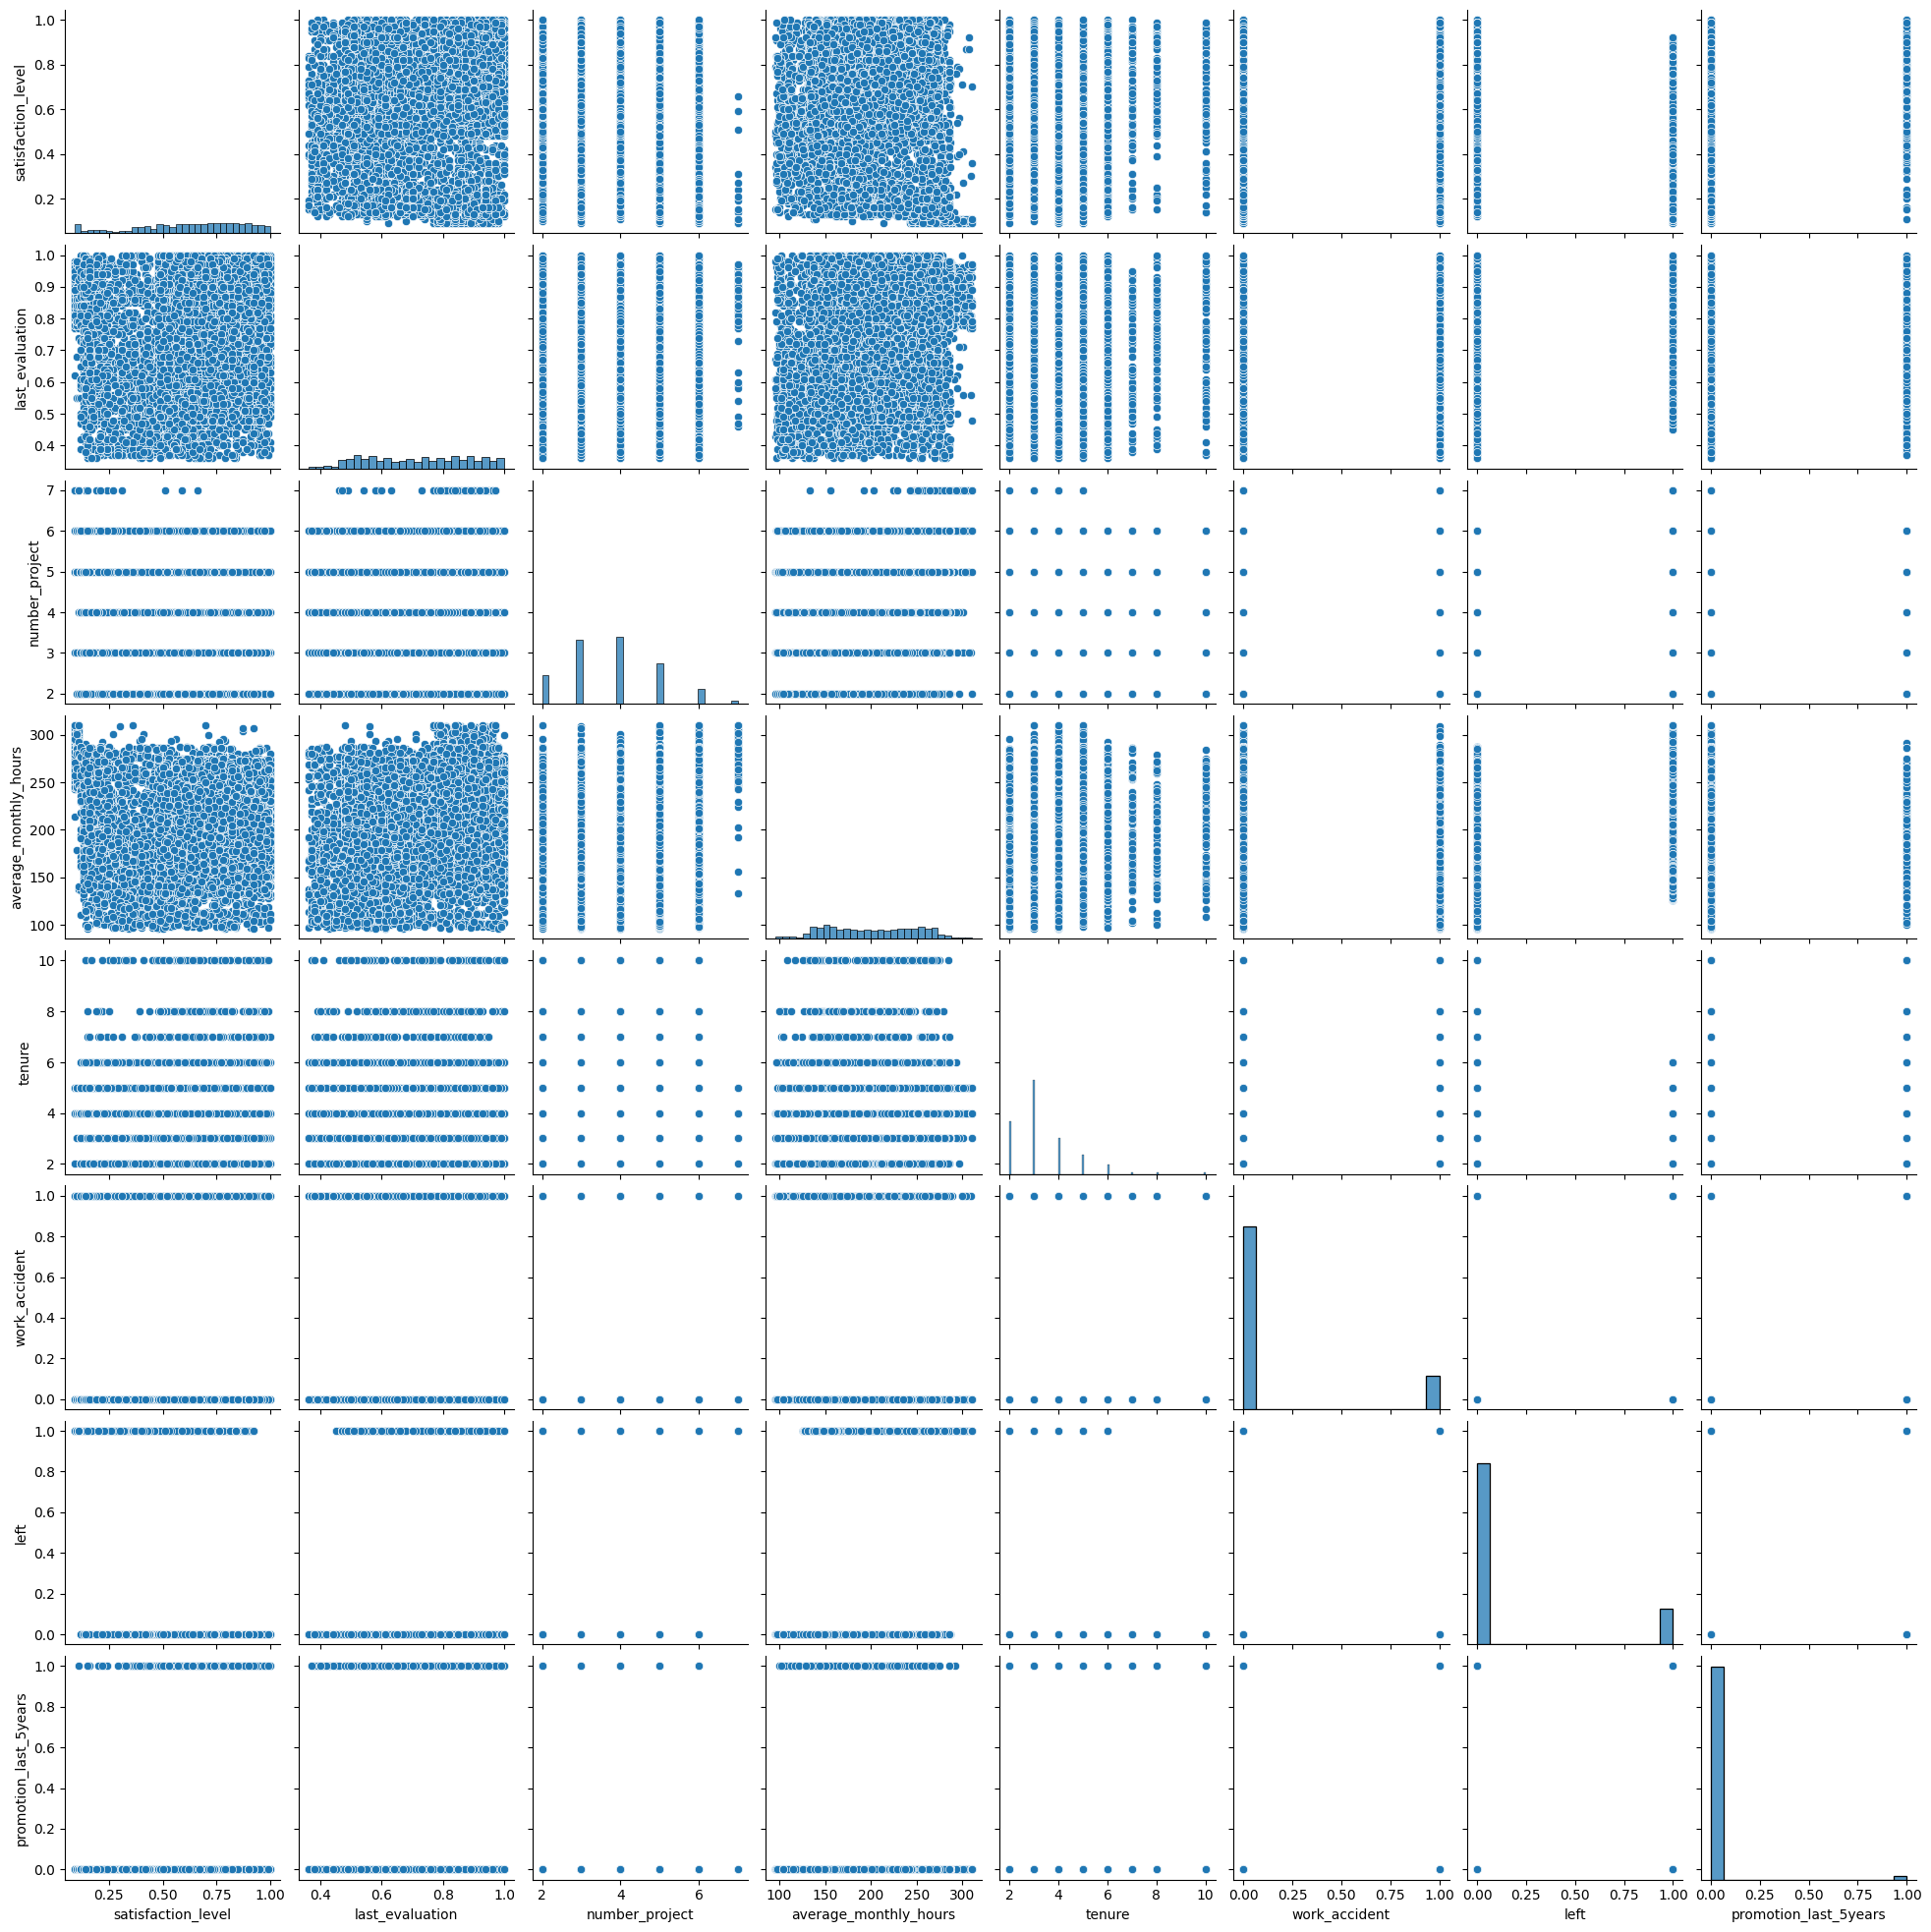

In [57]:
sns.pairplot(df1)

Le pairplot affiche des distributions univari√©es sur la diagonale et des nuages de points pour les relations entre les variables.

1Ô∏è Distribution des Variables (Diagonale)
Certaines variables semblent discr√®tes avec peu de valeurs possibles (ex. number_project, work_accident, promotion_last_5years).
satisfaction_level et last_evaluation semblent √™tre des variables continues, bien r√©parties entre 0 et 1.
tenure et number_project montrent des valeurs concentr√©es sur certains niveaux sp√©cifiques.


2Ô∏è Corr√©lations Visuelles
satisfaction_level vs last_evaluation : Distribution semble al√©atoire, mais il peut y avoir une structure cach√©e.
number_project vs average_monthly_hours : Ces variables semblent fortement corr√©l√©es (logique, plus un employ√© a de projets, plus il travaille d'heures).
work_accident et promotion_last_5years : Variables binaires qui n'affichent pas de tendance claire visuellement.
tenure (anciennet√©) semble avoir un effet sur d'autres variables.


3Ô∏è Probl√®mes Possibles
Beaucoup de points superpos√©s : Certaines variables ayant peu de valeurs distinctes, la visualisation peut cacher des tendances.
Pr√©sence possible de valeurs aberrantes : Par exemple, dans average_monthly_hours, certaines valeurs semblent tr√®s √©lev√©es.
Lien entre satisfaction_level et le d√©part des employ√©s ? ‚Üí √Ä explorer avec une analyse plus cibl√©e !

Examinons les heures mensuelles moyennes par rapport aux niveaux de satisfaction.

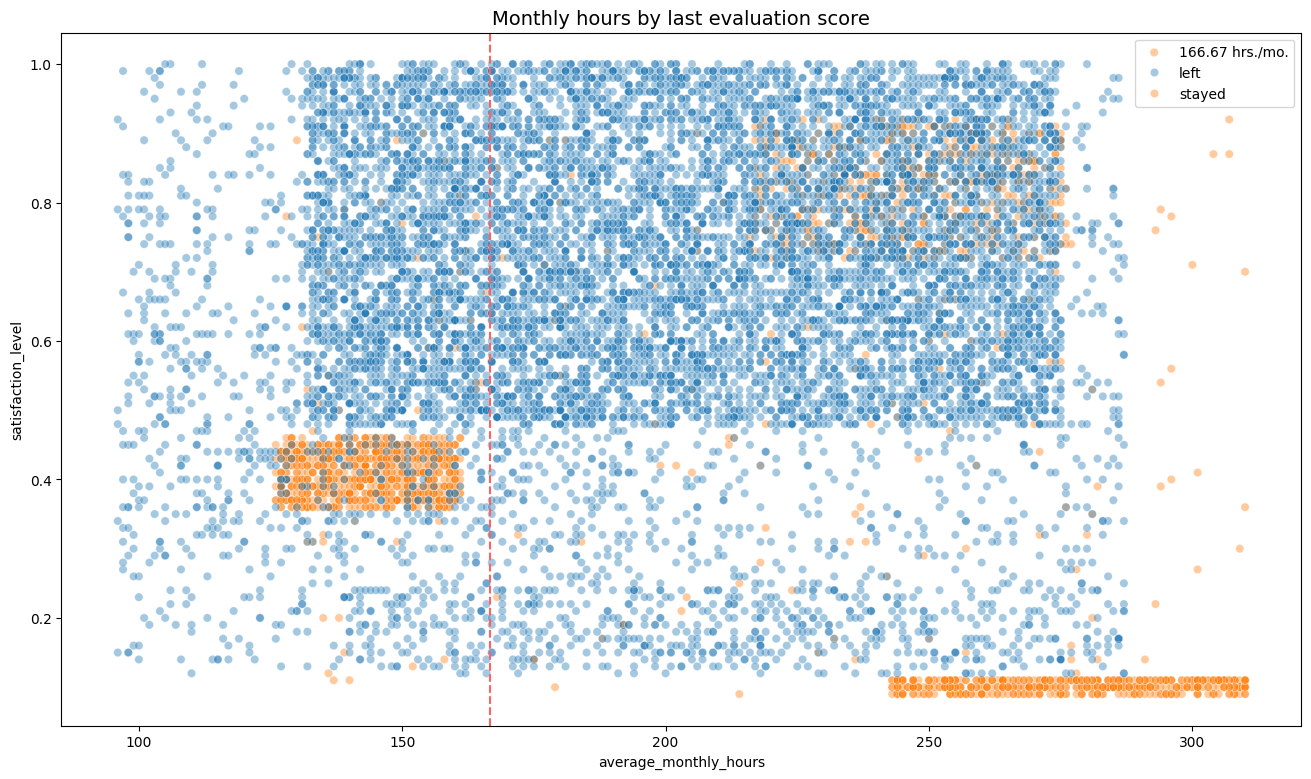

In [43]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

Insights du graphique "Monthly Hours by Last Evaluation Score"
Ce graphique est un scatter plot qui repr√©sente la relation entre :

L'axe X : Le nombre moyen d'heures travaill√©es par mois (average_monthly_hours).
L'axe Y : Le niveau de satisfaction (satisfaction_level).
Les couleurs :
Orange = Employ√©s qui ont quitt√© (left=1).
Bleu = Employ√©s qui sont rest√©s (left=0).
Ligne rouge verticale = R√©f√©rence des 166,67 heures par mois (√©quivalent √† 40 heures/semaine).
1. Deux groupes majeurs d‚Äôemploy√©s ayant quitt√© (orange)
Observation 1 : Un groupe √† faible satisfaction (~0.4) et peu d'heures travaill√©es (~120-150h)
Ces employ√©s travaillent moins que la moyenne et ont une satisfaction tr√®s faible.
Ils se situent bien en dessous de la ligne rouge (166.67h/mois).
Interpr√©tation :

Ces employ√©s ont probablement √©t√© licenci√©s ou mis √† l'√©cart.
Il peut s'agir d‚Äôun manque d‚Äôengagement, de mauvaise performance ou d‚Äôune insatisfaction g√©n√©rale.
L‚Äôentreprise devrait analyser si ces employ√©s avaient des opportunit√©s de progression ou un bon encadrement.
Observation 2 : Un autre groupe avec une tr√®s forte charge de travail (250-300h/mois)
Ces employ√©s travaillaient bien au-del√† de la norme, d√©passant 250 heures/mois.
Leur satisfaction est extr√™mement basse (~0.1-0.2).
Interpr√©tation :

Ces employ√©s ont probablement d√©missionn√© suite √† une surcharge de travail.
Un √©puisement professionnel (burnout) est une cause √©vidente.
Solution : L‚Äôentreprise doit revoir la r√©partition des charges et surveiller les heures suppl√©mentaires.
2. Les employ√©s rest√©s ont un √©ventail plus large de satisfaction
Les employ√©s en bleu (left=0) sont bien r√©partis sur toute l‚Äô√©chelle de satisfaction.
Cela montre que certains restent malgr√© une faible satisfaction, peut-√™tre √† cause de la stabilit√© financi√®re ou d‚Äôun manque d‚Äôalternatives.
Interpr√©tation :

La satisfaction seule n‚Äôest pas suffisante pour expliquer le turnover.
Il faut la croiser avec d‚Äôautres variables comme la promotion, le salaire et la charge de travail.
3. La majorit√© des employ√©s travaillent entre 150 et 250 heures
La densit√© de points bleus est concentr√©e entre 150h et 250h.
Cela signifie que la plupart des employ√©s restent quand leur charge de travail est raisonnable.
Interpr√©tation :

Un bon √©quilibre semble √™tre entre 150h et 220h/mois.
L‚Äôentreprise peut fixer un seuil critique (ex. : au-dessus de 250h, risque accru de d√©part).
4. La ligne rouge (166.67h) sert de r√©f√©rence pour la "norme"
Une grande partie des employ√©s restent autour de cette valeur.
Les employ√©s qui quittent sont soit sous-charg√©s (<150h), soit surcharg√©s (>250h).
Interpr√©tation :

La sous-charge (moins de 150h) et la surcharge (plus de 250h) sont les deux extr√™mes √† √©viter.
L‚Äôentreprise doit surveiller les √©carts et s‚Äôassurer que les employ√©s ne tombent pas dans ces cat√©gories.

### Analyse des graphiques : Satisfaction et Anciennet√© (Tenure)

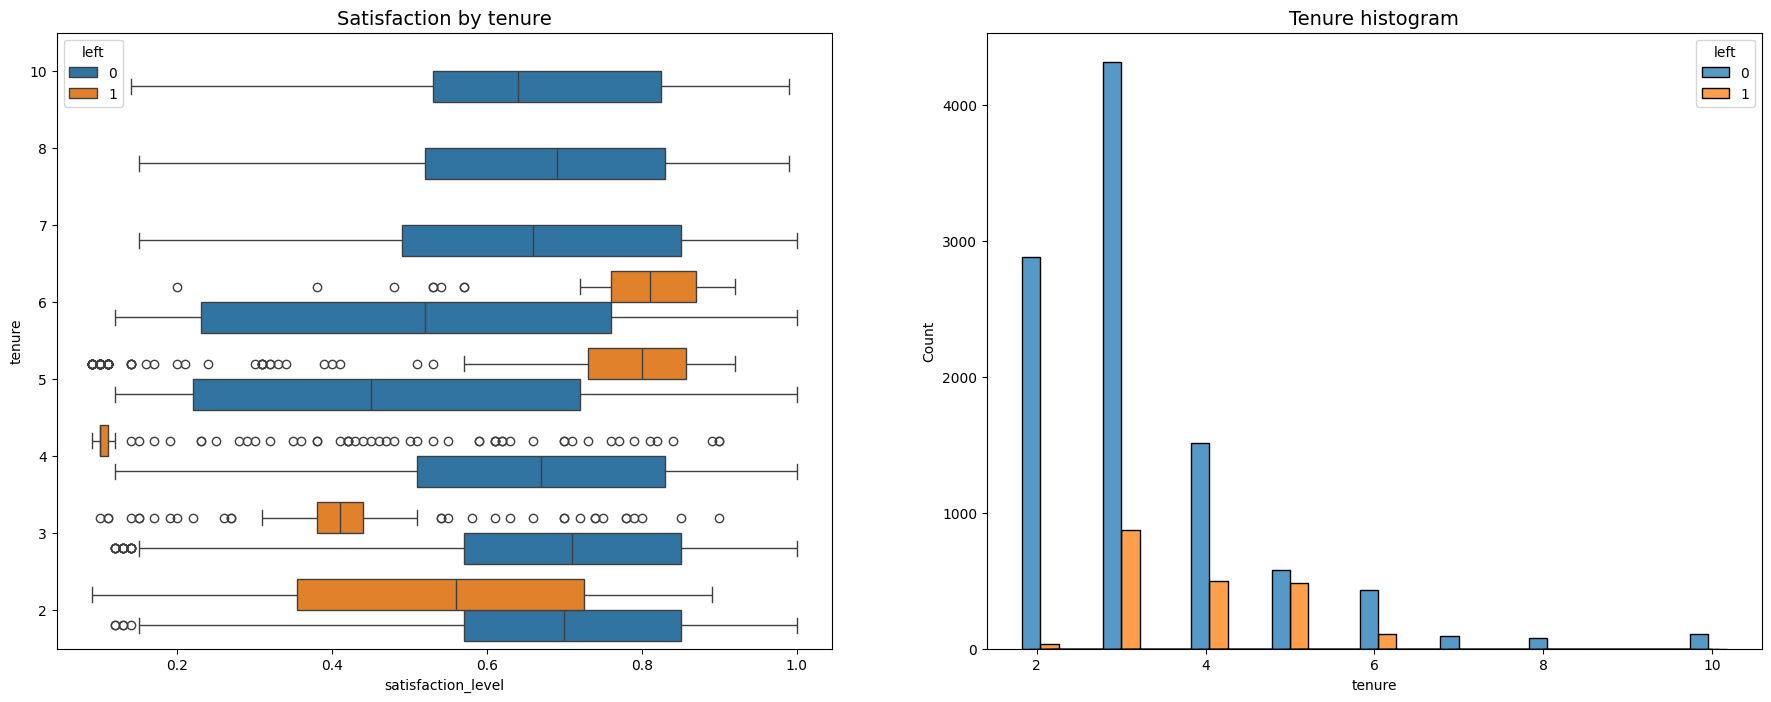

In [44]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

1. Satisfaction par anciennet√© (Boxplot, gauche)
Observations :

Les employ√©s avec 2 ans d‚Äôanciennet√© ont une faible satisfaction et un taux de d√©part √©lev√© (left=1 en orange).
Ceux avec 3 ans montrent √©galement un taux de d√©part significatif.
√Ä partir de 5 ans, les employ√©s qui restent (left=0 en bleu) ont une satisfaction plus vari√©e, mais le turnover diminue.
Les employ√©s avec 6 ans d‚Äôanciennet√© qui quittent ont une satisfaction mod√©r√©e (~0.6), ce qui peut indiquer un d√©sint√©r√™t ou une absence de perspectives d‚Äô√©volution.
Interpr√©tation :

Les employ√©s avec 2-3 ans d'anciennet√© sont les plus √† risque de quitter.
La satisfaction joue un r√¥le cl√© : les employ√©s insatisfaits partent plus vite, surtout au d√©but de leur carri√®re.
Apr√®s 6 ans, le turnover est plus faible, ce qui signifie que les employ√©s qui restent ont probablement trouv√© une stabilit√©.

2. Histogramme de l'anciennet√© (Droite)
Observations :

Le plus grand nombre d'employ√©s ont entre 2 et 4 ans d'anciennet√©.
Le turnover est particuli√®rement √©lev√© √† 3 ans, suivi de 2 et 4 ans.
Apr√®s 6 ans, le turnover devient tr√®s faible.
Interpr√©tation :

Les employ√©s quittent principalement apr√®s 2-3 ans, probablement √† cause du manque d‚Äô√©volution de carri√®re ou d‚Äôaugmentation de salaire.
Ceux qui restent au-del√† de 6 ans sont moins susceptibles de partir.
L‚Äôentreprise doit se concentrer sur la fid√©lisation des employ√©s autour de 2-4 ans en offrant des opportunit√©s de promotion et d‚Äôaugmentation de salaire.


Calculons les scores de satisfaction moyens et m√©dians des employ√©s qui sont partis et de ceux qui ne l‚Äôont pas fait.

In [45]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\1074052523.py:2: FutureWarning: The provided callable <function mean at 0x000001AEFF224940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\yohar\AppData\Local\Temp\ipykernel_24776\1074052523.py:2: FutureWarning: The provided callable <function median at 0x000001AEFF37DC60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

Comme pr√©vu, les scores de satisfaction moyens et m√©dians des employ√©s qui ont quitt√© l'entreprise sont inf√©rieurs √† ceux des employ√©s qui sont rest√©s. Il est int√©ressant de noter que parmi les employ√©s qui sont rest√©s, le score de satisfaction moyen semble √™tre l√©g√®rement inf√©rieur au score m√©dian. Cela indique que les niveaux de satisfaction parmi ceux qui sont rest√©s pourraient √™tre biais√©s vers la gauche.

Examinons les niveaux de salaire pour diff√©rentes p√©riodes d'anciennet√©.

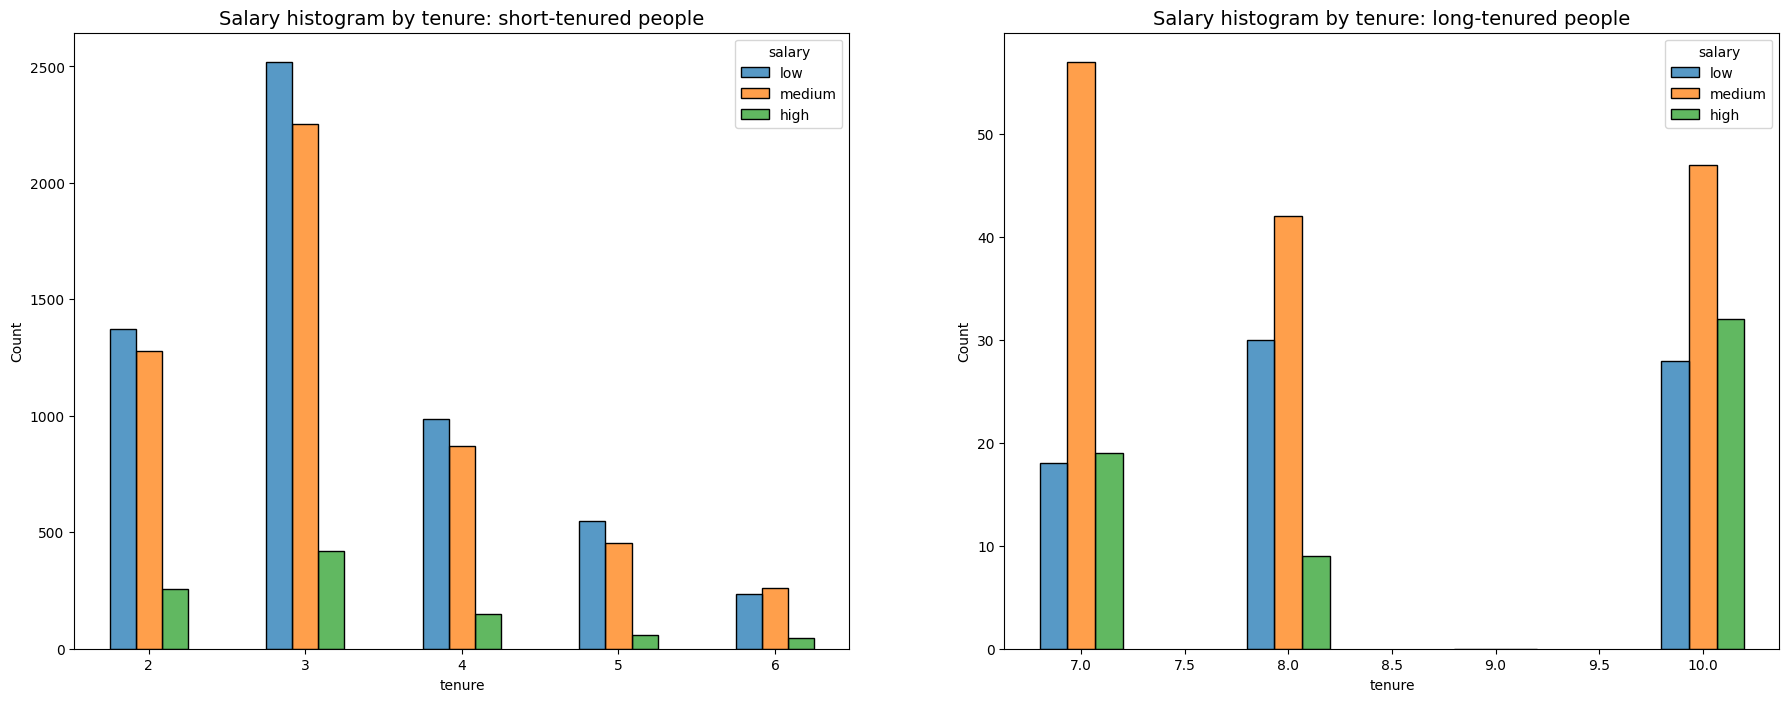

In [46]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

Ce diagramme compare la r√©partition des niveaux de salaire (low, medium, high) pour deux groupes d‚Äôemploy√©s selon leur anciennet√© (tenure) :

Graphique de gauche : Employ√©s avec une anciennet√© courte (2 √† 6 ans).
Graphique de droite : Employ√©s avec une anciennet√© longue (7 √† 10 ans).

1. Employ√©s avec une anciennet√© courte (2 √† 6 ans) ‚Äì Graphique de gauche
Observations :

Les employ√©s ayant 2 √† 4 ans d‚Äôanciennet√© sont tr√®s nombreux.
La majorit√© de ces employ√©s ont des salaires faibles (low) ou moyens (medium).
Tr√®s peu d‚Äôemploy√©s ont un salaire √©lev√© (high), surtout pour une anciennet√© de 2 √† 5 ans.
Interpr√©tation :

Les jeunes employ√©s sont majoritairement sous-pay√©s (low et medium).
Le manque de progression salariale pourrait √™tre un facteur de turnover apr√®s 2-3 ans.
Les employ√©s √† bas salaire risquent de partir s‚Äôils n‚Äôont pas d‚Äôaugmentation.
L‚Äôentreprise pourrait am√©liorer la fid√©lisation en augmentant progressivement les salaires.

2. Employ√©s avec une anciennet√© longue (7 √† 10 ans) ‚Äì Graphique de droite
Observations :

Les employ√©s qui restent plus longtemps ont tendance √† avoir des salaires plus √©lev√©s.
√Ä partir de 10 ans, il y a plus d‚Äôemploy√©s avec des salaires √©lev√©s (high).
Le niveau de salaire "medium" est dominant, m√™me apr√®s 7 ans.
Interpr√©tation :

Ceux qui restent longtemps finissent par obtenir des salaires plus √©lev√©s.
Cependant, une majorit√© garde un salaire moyen (medium), ce qui peut cr√©er une frustration pour ceux qui n‚Äô√©voluent pas financi√®rement.
Les employ√©s les plus exp√©riment√©s sont mieux r√©mun√©r√©s, ce qui motive certains √† rester.

Determinons s'il existe une corr√©lation entre le fait de travailler de longues heures et l'obtention de notes d'√©valuation √©lev√©es. Vous pouvez cr√©er un diagramme de dispersion entre ¬´ average_monthly_hours ¬ª et ¬´ last_evaluation ¬ª.

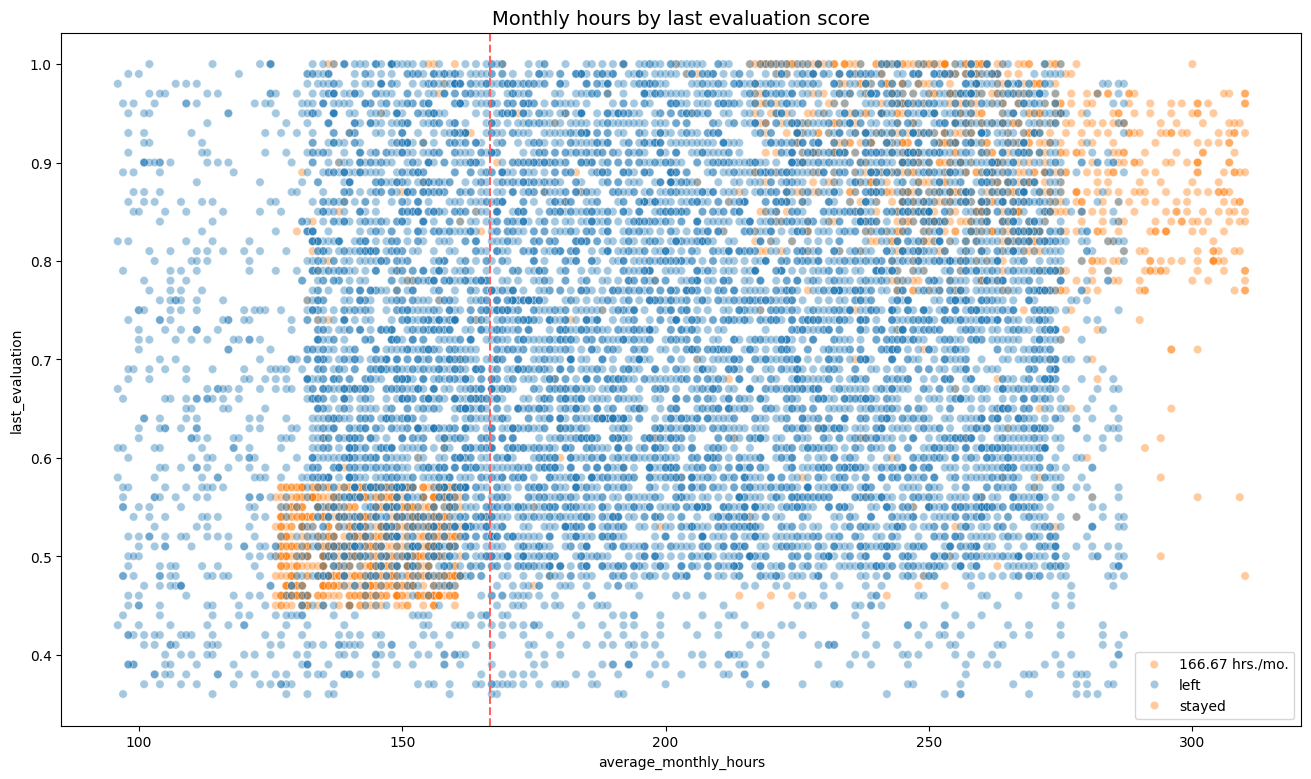

In [47]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

On remarque au niveau de  ceux qui ont travaill√© moins de 160h en environ 125 et 155, ceux qui sont parti ont une faible satisfaction entre 0,4 et 0,6 environ 
Les employ√©s travaillant entre 150-250h restent majoritairement
Les employ√©s avec de grand horaires partent majoritairement
Les employ√©s avec des faibles horaires aussi partent (peut √™tre du licenciement)

Examinons si les employ√©s qui ont travaill√© de tr√®s longues heures ont √©t√© promus au cours des cinq derni√®res ann√©es.

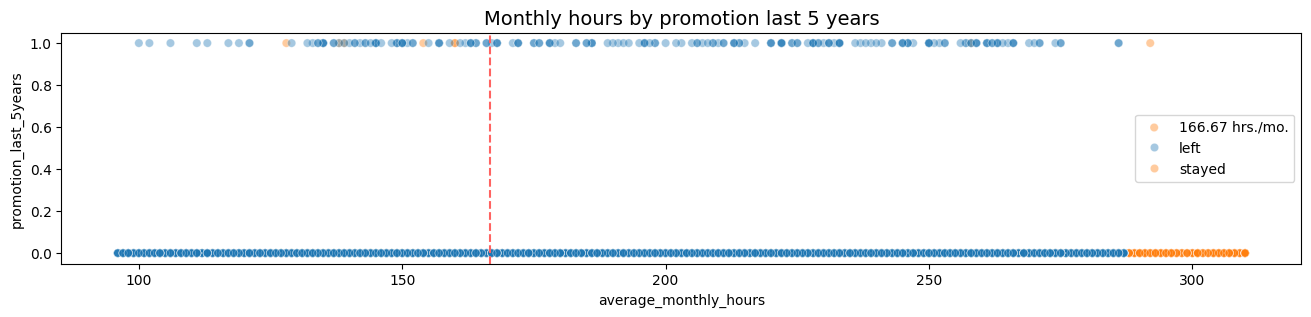

In [48]:
# Create a plot as needed 
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

On remarque sur les 5 dernieres ann√©es il y a eu peu de promotions
les employ√©s avec des grosses heure de travail et sans promotions quittent plus rapidement 
les promotions r√©duisent fortement les d√©parts

V√©rifions comment les employ√©s qui sont partis sont r√©partis entre les services.

In [50]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by department')

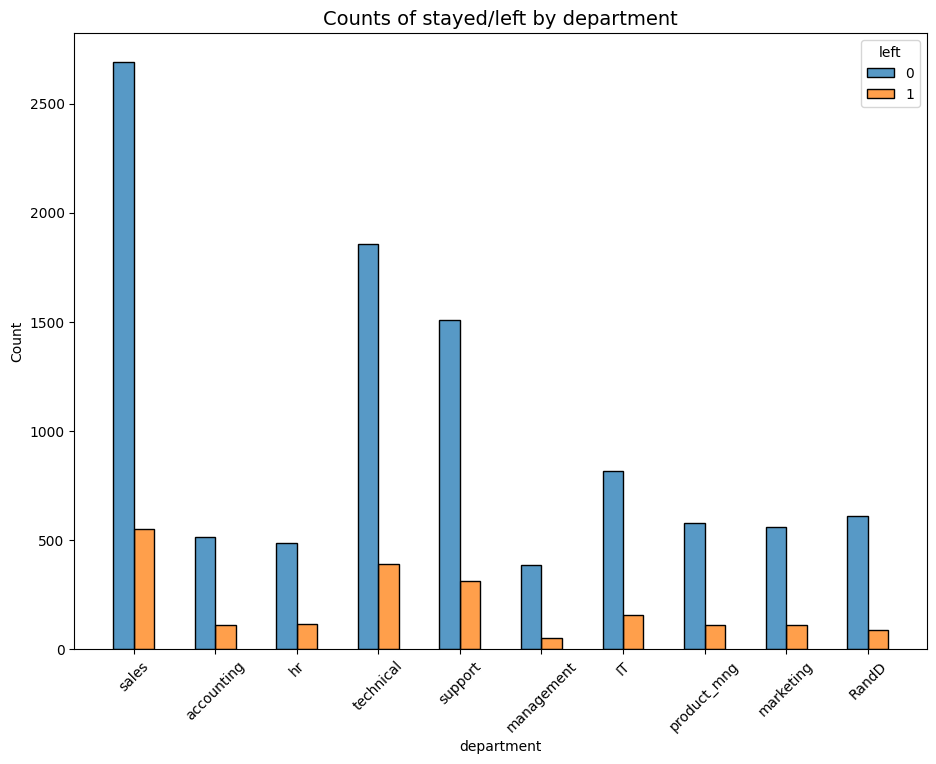

In [53]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14)

Sales (Ventes) a le plus de d√©parts	Pression √©lev√©e


Le support et l‚Äôing√©nierie ont aussi un turnover √©lev√©



Management et R&D ont peu de d√©parts


Mais en g√©n√©rale les diff√©rantes ne sont pas trop flagrantes

V√©rifions les fortes corr√©lations entre les variables dans les donn√©es.

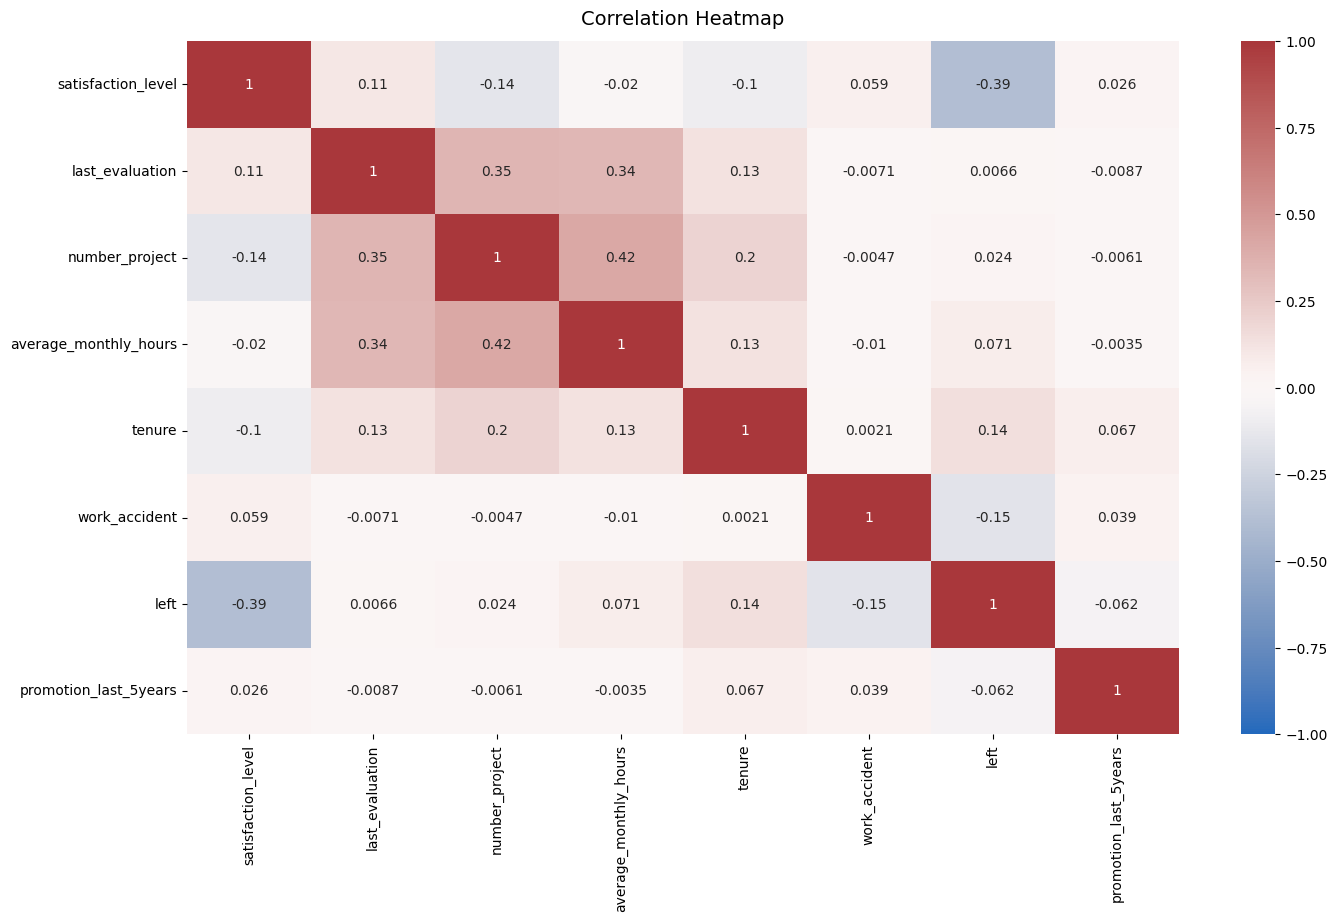

In [56]:
# S√©lectionner uniquement les colonnes num√©riques
df_numeric = df0.select_dtypes(include=['number'])

# Cr√©er la heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()


### Remarques

Variables les plus corr√©l√©es avec "left" (D√©part des employ√©s)
Satisfaction Level (-0.39)  (Corr√©lation n√©gative forte)

Les employ√©s avec un faible niveau de satisfaction sont plus susceptibles de partir.

Work Accident (-0.15)
‚Üí Un effet l√©g√®rement n√©gatif, mais pas tr√®s significatif.

Tenure (0.14)
‚Üí Plus d‚Äôanciennet√© peut √™tre un facteur influen√ßant le d√©part.
Average Monthly Hours (0.071)

‚Üí Les employ√©s travaillant beaucoup d‚Äôheures pourraient √™tre plus enclins √† quitter l‚Äôentreprise.

Number of Projects (0.024)
‚Üí Influence tr√®s faible sur la d√©cision de d√©part.


### Autres relations int√©ressantes
Number of Projects et Average Monthly Hours (0.42) 
‚Üí Plus un employ√© a de projets, plus il travaille d'heures.
Last Evaluation et Number of Projects (0.35)
‚Üí Les employ√©s mieux √©valu√©s semblent g√©rer plus de projets.

### Insights et Hypoth√®ses
Hypoth√®se 1 : La satisfaction est un facteur cl√© du d√©part
‚Üí Une baisse de satisfaction entra√Æne un taux de d√©part √©lev√©.
Hypoth√®se 2 : Les employ√©s surcharg√©s risquent de partir
‚Üí Une charge de travail √©lev√©e (beaucoup d‚Äôheures et de projets) peut influencer la d√©cision de d√©part.
Hypoth√®se 3 : L‚Äôanciennet√© joue un r√¥le
‚Üí Les employ√©s ayant plus d‚Äôexp√©rience semblent quitter plus souvent.



# pa`C`e : Construct

Notre objectif est de pr√©dire si un employ√© quitte l'entreprise, ce qui est une variable de r√©sultat cat√©gorielle. Cette t√¢che implique donc une classification. Plus pr√©cis√©ment, il s'agit d'une classification binaire, puisque la variable de r√©sultat ¬´ left ¬ª peut √™tre soit 1 (indiquant que l'employ√© est parti) soit 0 (indiquant que l'employ√© n'est pas parti).

### Building de notre Model

On va essayer de voir quel model est le mieux appropri√© pour notre projet

`A - R√©gression logistique`

In [58]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

On cr√©e un Heatmap pour visualiser la corr√©lation entre nos variables

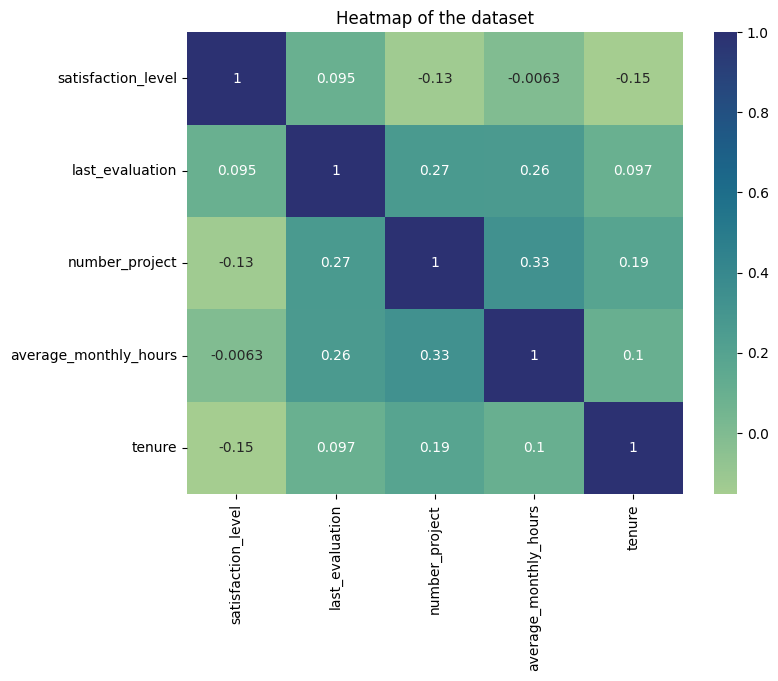

In [59]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

On cr√©e un graphique √† barres empil√©es pour visualiser le nombre d'employ√©s dans chaque service, en comparant ceux qui sont partis avec ceux qui ne l'ont pas fait.

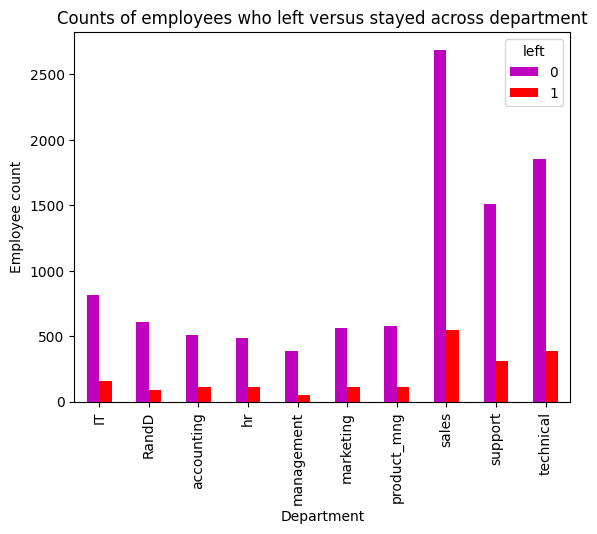

In [60]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Vu que la regression logistique est tres sensible au ouliers, on devrait supprimer ceux trouver dans `tenure`

In [61]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

On isole la variable target `y` que l'on veut pr√©dire 

In [62]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Nous allons maintenant retir√© le `target` de notre base de donn√©es

In [63]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

On s√©pare nos donn√©es en `training set` et `testing set`

In [65]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Maintenant on construit notre model de regression logistique

In [66]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Maintenant on test notre model de r√©gression

In [67]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

On visualise une matrice de confusion pour voir les r√©sultats de notre model

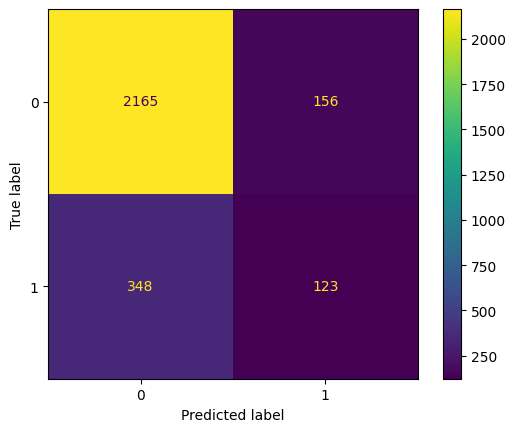

In [68]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

La matrice de confusion pr√©sente 4 valeurs cl√©s :


Pr√©dit : 0 (Reste)	Pr√©dit : 1 (Quitte)

Vrai : 0 (Reste)	‚úÖ 2165 (TN)	‚ùå 156 (FP)

Vrai : 1 (Quitte)	‚ùå 348 (FN)	‚úÖ 123 (TP)

üîπ `True Negatives` (TN - 2165) : Le mod√®le a correctement pr√©dit que 2165 employ√©s restent.

üîπ `False Positives` (FP - 156) : Le mod√®le a pr√©dit que 156 employ√©s partiraient, mais ils sont rest√©s.

üîπ `False Negatives `(FN - 348) : Le mod√®le a pr√©dit que 348 employ√©s resteraient, mais ils ont quitt√©. Erreur critique ‚ùó

üîπ `True Positives` (TP - 123) : Le mod√®le a correctement pr√©dit que 123 employ√©s quittent.


### Interpr√©tation des R√©sultats

1Ô∏è - Le mod√®le d√©tecte mal les d√©parts !

Beaucoup de FN (348) ‚Üí Il ne capte pas bien les employ√©s sur le point de partir.
Seuls 123 sur tous les employ√©s partants ont √©t√© d√©tect√©s correctement.

2Ô∏è - Bonne d√©tection des employ√©s qui restent

2165 TN montre que le mod√®le est bon pour reconna√Ætre ceux qui ne quittent pas.

Voyons voir le poucentage des gens qui partent et qui restent

In [69]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

La r√©partition est d'environ 83 %-17 %. Les donn√©es ne sont donc pas parfaitement √©quilibr√©es, mais elles ne sont pas trop d√©s√©quilibr√©es. Si elles √©taient plus gravement d√©s√©quilibr√©es, on souhaiterait peut-√™tre r√©√©chantillonner les donn√©es pour les rendre plus √©quilibr√©es. Dans ce cas, on va utiliser utiliser ces donn√©es sans modifier l'√©quilibre des classes et continuer √† √©valuer le mod√®le.

On creer une classification pour faire un retour sur notre model

In [70]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



1Ô∏è - Bonne Pr√©cision G√©n√©rale, mais un D√©s√©quilibre

L'accuracy globale de 82% semble correcte, mais elle est biais√©e car la classe majoritaire ("Ne quitte pas") domine les pr√©dictions.
La pr√©cision (precision) de 86% pour la classe "Ne quitte pas" montre que le mod√®le identifie bien ceux qui restent.
En revanche, seulement 44% de pr√©cision pour les d√©parts ‚Üí beaucoup de faux positifs (le mod√®le pr√©dit des d√©parts qui ne se produisent pas).

2Ô∏è - Un Rappel Tr√®s Faible pour la Classe "left"
Seulement 26% de rappel pour ceux qui partent :
Cela signifie que 74% des employ√©s qui quittent ne sont pas d√©tect√©s.
C‚Äôest un gros probl√®me, car l'objectif est pr√©cis√©ment d‚Äôidentifier ces employ√©s pour agir en amont.
93% de rappel pour "Ne quitte pas" montre que le mod√®le est biais√© vers la classe majoritaire.

3Ô∏è - Le Score F1 est Faible pour les D√©parts
Le F1-score de 0.33 pour la classe "left" indique que le mod√®le est peu performant pour cette cat√©gorie.
La moyenne pond√©r√©e du F1-score est de 0.80, ce qui est trompeur car elle est domin√©e par la classe "Ne quitte pas".

`B : Tree-based Model`

On isole notre target

In [71]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

On retire notre target de notre dataset

In [72]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

On divise nos donn√©es en training, validating et testing

In [74]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Decision tree - Round 1

In [77]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'f1': 'f1',
    'recall': 'recall'
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

On fixe le model aux donn√©es d'entrainement

In [78]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 3.58 s
Wall time: 3.77 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identifions le meilleur AUC

In [79]:
# Check best AUC score on CV
tree1.best_score_

np.float64(0.969819392792457)

C'est un super Score ce qui veut dire que notre model peut predir quand les employ√©s vont nous quitter

Une fonction qui extrait tous les scores 

In [81]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table


# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

Ce tableau contient les performances d‚Äôun mod√®le d‚Äôarbre de d√©cision (Decision Tree CV) √©valu√© √† l‚Äôaide de cross-validation (CV).

M√©trique	Valeur	Explication

Precision	0.9146	Parmi les employ√©s pr√©vus comme "quittant l'entreprise", 91.46% sont effectivement partis.

Recall	0.9169	Le mod√®le identifie correctement 91.69% des employ√©s qui quittent.

F1-score	0.9157	Moyenne harmonique entre pr√©cision et rappel, √©quilibre entre faux positifs et faux n√©gatifs.

Accuracy	0.9720	97.2% des pr√©dictions sont correctes (toutes classes confondues).

AUC (Area Under Curve)	0.9698	Le mod√®le distingue tr√®s bien les employ√©s qui partent de ceux qui restent (96.98% de chance de bien classifier).

Que signifient ces r√©sultats ?

1Ô∏è Le mod√®le est tr√®s performant ‚Üí Toutes les m√©triques sont sup√©rieures √† 91%, ce qui est un excellent score.

2Ô∏è Bonne pr√©cision et bon rappel ‚Üí Peu de faux positifs et peu de faux n√©gatifs, donc le mod√®le fait peu d‚Äôerreurs.

3Ô∏è L‚ÄôAccuracy (97.2%) est √©lev√©e ‚Üí Le mod√®le classe tr√®s bien les employ√©s.

4Ô∏è L‚ÄôAUC (96.98%) montre une tr√®s bonne s√©paration des classes ‚Üí Le mod√®le distingue bien les employ√©s qui restent et ceux qui partent.

`Random forest - Round 1`

On va construire un mod√®le de for√™t al√©atoire et configurer une recherche de grille √† validation crois√©e pour rechercher de mani√®re exhaustive les meilleurs param√®tres du mod√®le.

In [84]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'f1': 'f1',
    'recall': 'recall'
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

On fixe notre model avec les donn√©es d'entrainement 

In [85]:
%%time
rf1.fit(X_train, y_train) 

CPU times: total: 25min 42s
Wall time: 27min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

On sp√©cifi l'endroit ou on veut sauvegarder notre model

In [86]:
# Define a path to the folder where you want to save the model
path = ''

Fonction pour sauvegarder notre model et le recuperer 

In [87]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [88]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

On sauvegrade notre model et on le r√©cupere

In [89]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [90]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identification du meilleur AUC

In [91]:
# Check best AUC score on CV
rf1.best_score_

np.float64(0.9804250949807172)

Identification des valeures optimales  pour nos parametres

In [92]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

On compare nos 2 scores

In [93]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Le mod√®le Random Forest est meilleur que l‚Äôarbre de d√©cision sur tous les crit√®res !

Il est plus pr√©cis, mieux √©quilibr√© et s√©pare mieux les classes (AUC plus haut).

C‚Äôest donc le mod√®le √† privil√©gier pour pr√©dire les d√©parts des employ√©s.

Maintenant nous allons √©valuer nos donn√©es sur les donn√©es de test

In [95]:
#Une fonction qui recup√®re tous les scores d'un model de pr√©diction
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

Les r√©sultats des tests sont tr√®s similaires aux r√©sultats de validation, ce qui est une bonne chose. Il semble que ce mod√®le soit solide. √âtant donn√© que cet ensemble de tests n'a √©t√© utilis√© que pour ce mod√®le, vous pouvez √™tre plus s√ªr que les performances de votre mod√®le sur ces donn√©es sont repr√©sentatives de ses performances sur des donn√©es nouvelles et in√©dites.

Feature Engineering

Je suis sceptique quant aux scores d'√©valuation √©lev√©s. Il existe un risque de fuite de donn√©es. 

Il est probable que l'entreprise n'ait pas de niveaux de satisfaction signal√©s pour tous ses employ√©s. Il est √©galement possible que la colonne `average_monthly_hours` soit une source de fuite de donn√©es. Si les employ√©s ont d√©j√† d√©cid√© de d√©missionner ou ont d√©j√† √©t√© identifi√©s par la direction comme des personnes √† licencier, ils peuvent travailler moins d'heures.

La premi√®re s√©rie de mod√®les d'arbres de d√©cision et de for√™ts al√©atoires incluait toutes les variables comme caract√©ristiques. Cette prochaine s√©rie int√©grera l'ing√©nierie des caract√©ristiques pour cr√©er des mod√®les am√©lior√©s.

On va proc√©der en abandonnant `satisfaction_level` et en cr√©ant une nouvelle fonctionnalit√© qui capture approximativement si un employ√© est surmen√©. On pourrait appeler cette nouvelle fonctionnalit√© ¬´ surcharg√©e ¬ª. Ce sera une variable binaire.

In [96]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [97]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [98]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

On supprime le `average_monthly_hours`

In [99]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

On reprend notre D√©cision tree - Round 2

In [103]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': "accuracy", 'precision': "precision", 'recall': "recall", 'f1': "f1", 'roc_auc': "roc_auc"}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [104]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 3.73 s
Wall time: 4.21 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [105]:
# Check best params
tree2.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [106]:
# Check best AUC score on CV
tree2.best_score_

np.float64(0.969819392792457)

Ce model fonctionne plut√¥t bien m√™me sans les donn√©es qu'on a retirer

Regardons les autres scores

In [107]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.914552  0.916949  0.915707  0.971978  0.969819


Certains autres scores ont baiss√©. C'est normal √©tant donn√© que moins de caract√©ristiques ont √©t√© prises en compte dans cette phase du mod√®le. Les scores sont n√©anmoins tr√®s bons.

Random forest - Round 2

In [108]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': "accuracy", 'precision': "precision", 'recall': "recall", 'f1': "f1", 'roc_auc': "roc_auc"}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [109]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: total: 19min 48s
Wall time: 20min 43s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [ ]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [ ]:
# Check best params
rf2.best_params_

In [ ]:
# Check best AUC score on CV
rf2.best_score_

In [ ]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

Le random forest √†  de meilleures performances

Nous allons donc l'utiliser pour la suite afin d'obtenir le score

In [ ]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

In [ ]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='')

Le mod√®le pr√©dit plus de faux positifs que de faux n√©gatifs, ce qui signifie que certains employ√©s peuvent √™tre identifi√©s comme risquant de d√©missionner ou d'√™tre licenci√©s, alors que ce n'est pas le cas. Mais il s'agit toujours d'un mod√®le solide.

√Ä des fins d'exploration, nous allons inspecter les divisions du mod√®le d'arbre de d√©cision et les caract√©ristiques les plus importantes du mod√®le de for√™t al√©atoire.

In [ ]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [ ]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

In [ ]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [ ]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

1Ô∏è Les facteurs les plus influents :

last_evaluation (√âvaluation de performance)

‚Üí Les employ√©s avec des √©valuations tr√®s basses ou tr√®s hautes sont plus susceptibles de partir.

number_project (Nombre de projets) 

‚Üí Trop peu ou trop de projets peut √™tre un indicateur de d√©part (ennui ou burnout).

2Ô∏è Les facteurs secondaires :

tenure (anciennet√©) : Influence mod√©r√©e ‚Üí Les employ√©s r√©cents ou tr√®s anciens peuvent √™tre plus enclins √† partir.

overworked (surcharge de travail) : Un facteur pertinent, mais l√©g√®rement moins influent dans Random Forest.

3Ô∏è Les facteurs les moins influents :

Le salaire et le d√©partement ont un impact faible sur la pr√©diction des d√©parts.
Les accidents de travail (work_accident) n‚Äôont presque aucune influence.

# pac`E` : Execute

### Conclusion
L‚Äôanalyse des mod√®les et l‚Äôimportance des variables confirment que la surcharge de travail est un facteur cl√© de d√©part des employ√©s.

Les employ√©s ayant trop ou trop peu de projets sont plus enclins √† quitter.

Les employ√©s avec des √©valuations tr√®s basses ou tr√®s hautes sont √©galement √† risque.

L‚Äôanciennet√© influence le d√©part, notamment autour de 4 ans d‚Äôexp√©rience.

Le mod√®le Random Forest a obtenu les meilleurs r√©sultats avec un AUC de 98.04%, prouvant sa capacit√© √† bien distinguer les employ√©s qui restent et ceux qui partent.



### Recommandations pour Am√©liorer la R√©tention

Pour limiter le taux de rotation des employ√©s, voici des actions √† proposer aux stakeholders :

1Ô∏è Limiter le nombre de projets par employ√© pour √©viter surcharge et burnout.

2Ô∏è √âvaluer les opportunit√©s de promotion apr√®s 4 ans d‚Äôanciennet√© ou analyser pourquoi ces employ√©s sont insatisfaits.

3Ô∏è Revoir la gestion du temps de travail :

R√©compenser les employ√©s pour les heures suppl√©mentaires ou s‚Äôassurer qu‚Äôils ne sont pas oblig√©s d‚Äôen faire.

Clarifier les politiques de r√©mun√©ration des heures suppl√©mentaires.
D√©finir des attentes claires sur la charge de travail et le droit au repos.
4Ô∏è Organiser des discussions internes sur la culture d‚Äôentreprise pour identifier et r√©soudre les probl√®mes RH.

5Ô∏è R√©former le syst√®me d‚Äô√©valuation des performances :
√âviter d‚Äôassocier une haute √©valuation uniquement aux employ√©s travaillant +200 heures/mois.
Mettre en place une √©chelle proportionnelle de reconnaissance pour valoriser la contribution r√©elle de chacun.

###  Prochaines √âtapes

1Ô∏è V√©rifier s‚Äôil y a encore une fuite de donn√©es (Data Leakage)

Tester le mod√®le sans la variable last_evaluation pour voir si les pr√©dictions restent fiables.

V√©rifier si les √©valuations sont trop li√©es aux d√©parts, et envisager un mod√®le qui pr√©dit plut√¥t la performance.

2Ô∏è Explorer d'autres approches analytiques

Construire un mod√®le K-Means pour identifier des profils types d‚Äôemploy√©s √† risque.

Analyser la rotation du personnel sur plusieurs ann√©es (s√©ries temporelles) pour mieux anticiper les d√©parts.

3Ô∏è Tester XGBoost et optimiser les hyperparam√®tres de Random Forest

V√©rifier si XGBoost peut surpasser Random Forest.

Affiner les param√®tres pour am√©liorer encore la pr√©cision du mod√®le.

## Conclusion finale
Les r√©sultats sont clairs : l‚Äôentreprise doit agir sur la surcharge de travail, la reconnaissance des employ√©s et l‚Äô√©quilibre entre performance et bien-√™tre. En appliquant ces recommandations, elle pourra am√©liorer la satisfaction des employ√©s, r√©duire le turnover et optimiser les co√ªts de recrutement et formation.